In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import distance
from scipy.stats import pearsonr
%matplotlib inline

In [9]:
df = pd.read_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/occurrences_lemmes_servitude/seruus_propre.csv', sep =',', header = 4)

In [12]:
df.columns = ["1","indice","pre","lemma","post"]

In [38]:
liste_lemmes = ['seruus','mancipium','ancilla','sclauus','famulus','colonus','seruula','serua']
nbr_occurrences = [39420,5704,3374,503,652,529,20,3063]

index = ['1','2','3','4','5','6','7']


In [49]:
df = pd.DataFrame(liste_lemmes,nbr_occurrences)
df.reset_index(inplace=True)
df.columns = ['Occurrences','lemme']
df['Occurrences'].describe()

count        8.000000
mean      6658.125000
std      13382.030525
min         20.000000
25%        522.500000
50%       1857.500000
75%       3956.500000
max      39420.000000
Name: Occurrences, dtype: float64

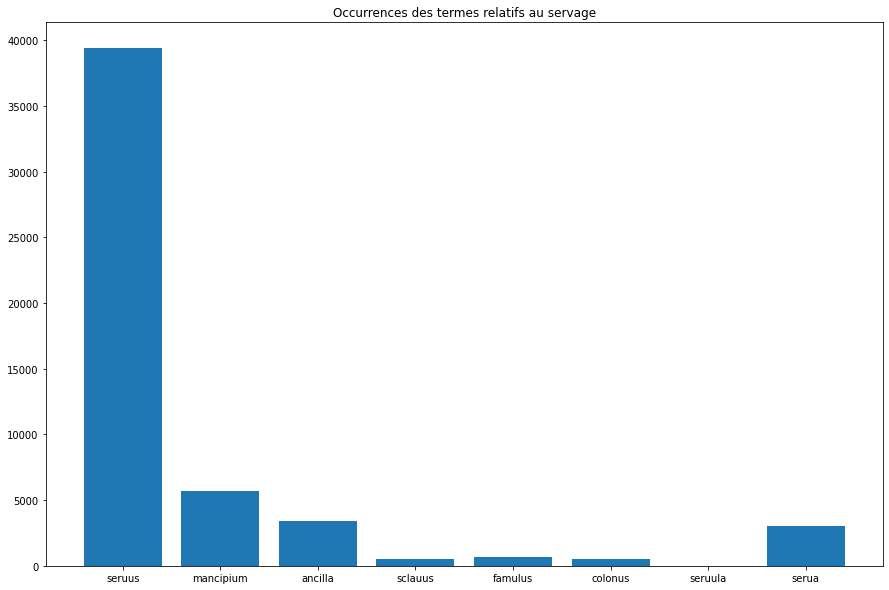

In [58]:
plt.figure(figsize=(15,10))
plt.bar(liste_lemmes,nbr_occurrences)
plt.title('Occurrences des termes relatifs au servage')
plt.savefig('Occurrences des termes relatifs au servage', dpi=300)

In [113]:

dfSeruus

,texte,pre,lemma,post
0,0800_passau_224441,mea aliquid deo conferre </s><s> Trado itaque ...,seruo,ancillas pratas rures campos siluas aquarum qu...
1,0800_pflugk-harttung_236150,autem hec in uilla puplica nuncupante Battaues...,seruus,seruorum Dei omnibus archiepiscopis et episcop...
2,0800_pflugk-harttung_236150,in uilla puplica nuncupante Battaues regnante ...,seruorum,Dei omnibus archiepiscopis et episcopis per to...
3,0800_pflugk-harttung_236150,apostolice auctoritatis priuilegio fretus omni...,seruorum,ancillarum uillarum redituum possederit uel De...
4,0800_saintgall_224984,de rebus meis ad monasterium sancti Gallonis c...,seruum,meum nomine Otmunt cum hoba sua in uilla que u...
...,...,...,...,...
34229,9999_marmoutiermanceau_255656,in uinea illa erat dedimus ei et suo heredi ad...,seruus,uel colibertus nullus habebit </s><s> Fecimus ...
34230,9999_marmoutiervendomois_256306,nostri Maioris scilicet huius habitatores Mona...,serui,quondam et forestarii comitis Fulconis calumni...
34231,9999_marmoutiervendomois_256373,Rainaldus presbyter de Sancto Leobino Morandus...,seruus,Fulcherii Fulcradus Bastardus </s><s> Noticia ...
34232,9999_montcassin_233318,secundi pape archiepiscopis episcopis et abbat...,seruus,seruorum Dei omnibus episcopis et reliquis Chr...


In [115]:
dfSeruus = pd.read_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_word_clean.csv', sep =',',header=4)
dfSeruus.columns = ['texte','pre','lemma','post']
dfSeruus['new'] = dfSeruus['pre'] + (' ') + dfSeruus['lemma']+ (' ') + dfSeruus['post']
dfSeruus['new'] = dfSeruus['new'].str.lower()
dfSeruus['drop'] = dfSeruus['new'].str.find('seruus seruorum dei')
dfSeruus = dfSeruus[dfSeruus['drop'] == -1]
dfSeruus = dfSeruus.drop('texte',axis=1)
dfSEruus = dfSeruus.drop("drop", axis=1)

In [107]:
df = df.drop('texte',axis=1)
df = df.drop("drop", axis=1)

In [136]:
df2 = pd.read_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Serua/Serua_complet.csv', sep =',',header=4)

In [137]:
df2.columns = ['texte','pre','lemma','post']
df2['lemma'].str.lower().value_counts()

seruis    2623
seruam       3
serua        1
Name: lemma, dtype: int64

In [120]:
df2 = pd.read_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Ancilla/Ancilla_complet.csv', sep =',',header=4)
df2.columns = ['texte','pre','lemma','post']
df2['new'] = df2['pre'] + (' ') + df2['lemma']+ (' ') + df2['post']
df2['new'] = df2['new'].str.lower()
df2['drop'] = df2['new'].str.find('seruis et ancillis')
df2= df2[df2['drop'] == -1]
df2 = df2.drop('texte',axis=1)
#dfSEruus = dfSeruus.drop("drop", axis=1)
df2

,pre,lemma,post,new,drop
0,auctoritatis priuilegio fretus omnia quecumque...,ancillarum,uillarum redituum possederit uel Deinceps ad p...,auctoritatis priuilegio fretus omnia quecumque...,-1
4,ad ecclesiam sancte Marie hoc est campis prati...,ancillis,peculium utrumque sexum mobilium et immobilium...,ad ecclesiam sancte marie hoc est campis prati...,-1
5,uoluerit inprimis iram dei incurrat et conpona...,ancillas,et omnia que habuit post migrationem illius </...,uoluerit inprimis iram dei incurrat et conpona...,-1
6,que habuit post migrationem illius </s><s> Hec...,ancillis,peculium utrumque sexu et post obitum meum fir...,que habuit post migrationem illius </s><s> hec...,-1
7,quesitis et adinquirendis cum omni integritate...,ancillas,colonos colonas tam ibidem oriundus quam ex al...,quesitis et adinquirendis cum omni integritate...,-1
...,...,...,...,...,...
2846,appendendum </s><s> Datum anno domini Mcclxxxx...,ancillis,magistre et conuentui sororum in Scheftershein...,appendendum </s><s> datum anno domini mcclxxxx...,-1
2847,<s> Datum anno domini Mcc nonagesimo sexto fer...,ancillis,</s><s> abbatisse et conuentui monasterii in O...,<s> datum anno domini mcc nonagesimo sexto fer...,-1
2848,de Russales cuilibet ipsorum quadraginta solid...,ancille,mee de Uillariis uiginti solidos semel et Mari...,de russales cuilibet ipsorum quadraginta solid...,-1
2849,<s> Item Theobaldo aurige meo uiginti solidos ...,ancille,mee de Rossilione uiginti solidos semel et Gui...,<s> item theobaldo aurige meo uiginti solidos ...,-1


In [109]:
df =  pd.DataFrame(df['lemma'].str.lower().value_counts())
df

,lemma
seruorum,1947
seruos,1865
seruus,1157
serui,926
seruum,723
seruo,584
serue,52


In [789]:
df2 = pd.read_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Seruus/Lemma_brut/Tags/800-849.csv', sep =',',header=4)
df2.columns = ['texte','pre','lemma','post']
df2['new'] = df2['pre'] + (' ') + df2['lemma']+ (' ') + df2['post']
df2['new'] = df2['new'].str.lower()
df2['drop'] = df2['new'].str.find('seruus2/sub  seruus2/sub  deus/sub' or 'seruus/sub seruus/sub deus/sub')
df2= df2[df2['drop'] == -1]
df2 = df2.drop('texte',axis=1)
df2 = df2.drop("drop", axis=1)
df2.to_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Seruus/Lemma_clean/800-849.csv')

In [345]:
df3 = pd.read_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Seruus/Lemma_brut/Tags/850-899.csv', sep =',',header=4)

<s> 3/num </s><s> ago/vbe  --/nam </s><s> texo/vbe  --/sub  500/num  --/adv  --/nam </s><s> --/vbe  --/nam  --/sub  --/sub  --/vbe  --/vbe  500/num  --/adv </s><s> in/pre  nomen/sub  sanctus1/qlf  et/con  indiuiduus/qlf  --/nam </s><s> -/nam  diuinus/qlf  propitio/vbe  clementia/sub  rex/sub </s><s> si/con  seruus2/sub  deus/sub  iustus/qlf  petitio/sub  auris/sub  noster/qlf  serenitas/sub  accommodo/vbe  is2/pro  qui2/pro  ad/pre  effectum/sub  pius/qlf  petitio/sub  ops/sub  fero/vbe  perduco/vbe  hic3/pro  nos/pro
--/nam  do/vbe  copio/vbe </s><s> --/vbe  partio1/vbe  --/vbe  en2/int  peto/vbe  texo/vbe  --/vbe  --/qlf  hau/int  --/sub  de/pre  --/nam  --/vbe  --/nam  505/num  --/qlf </s><s> in/pre  nomen/sub  sanctus1/qlf  et/con  indiuiduus/qlf  --/nam </s><s> -/nam  gratia2/sub  deus/sub  rex/sub </s><s> si/con  seruus2/sub  deus/sub  suggestio/sub  qui2/pro  nos/pro  pro/pre  suus/qlf  utilitas/sub  insinuo/vbe  clemens/qlf  aura/sub  excipio/vbe  et/con  is2/pro  necessitas/su

In [268]:
df.to_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Mancipium/Cooccurences/QLF/cooccurrences_QLF')

In [365]:
def csv_tojaccard(path1,path2):
    
    df = pd.read_csv(path1, sep=",", header = 0, nrows = 100)
    df.columns = ['indice','occurrence','lemme']
    df[['lemme']]
    liste1 = list(df["lemme"])
    
    df2 = pd.read_csv(path2, sep=",", header = 0, nrows = 100)
    df2.columns = ['indice','occurrence','lemme']
    df2[['lemme']]
    liste2 = list(df2["lemme"])
    
    jaccard = distance.jaccard(liste1,liste2)
    
    return 1 - jaccard

#C'est parce que c'est une différence hahahahahahaha

In [512]:
csv_tojaccard('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Seruus/Cooccurences/VBE/1250-1299.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Serua/Cooccurrences/VBE/1250-1299.csv')

0.12857142857142856

In [306]:
def pearson(path1,path2):
    
    df = pd.read_csv(path1, sep=",", header = 0, nrows = 100)
    df.columns = ['indice','occurrence','lemme']
    df[['lemme']]
    liste1 = list(df["lemme"])
    
    df2 = pd.read_csv(path2, sep=",", header = 0, nrows = 100)
    df2.columns = ['indice','occurrence','lemme']
    df2[['lemme']]
    liste2 = list(df2["lemme"])
    
    corr, _ = pearsonr(liste1, liste2) 
    return('Pearsons correlation: %.3f' % corr) 

In [281]:
df = pd.read_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Mancipium/Cooccurrences/QLF/cooccurrences_QLF.csv', sep=',', header=0)
        

In [309]:
def indice_similarite(dic1, dic2):
    for mot in dic1: 
        if mot not in dic2:
            dic2[mot] = 0
    for mot in dic2:
        if mot not in dic1:
            dic1[mot] = 0
    differences_occurences = 0
    for mot in dic1:
        differences_occurences += abs(dic1[mot] - dic2[mot])
    min_somme = 0
    max_somme = sum(list(dic1.values())) + sum(list(dic2.values()))
    differences_occurences /= max_somme
    return 1 - differences_occurences

In [310]:
def csv_tosim(path1,path2):
    
    
    df = pd.read_csv(path1, sep=",", header = 0, nrows = 100)
    df.columns = ['indice','occurrence','lemme']
    #df[['lemme','occurrence','apparitions_totales']]
    
    df = df[["lemme","occurrence"]]
    dictionnaire1 = pd.Series(df.occurrence.values,index=df.lemme).to_dict()
    
    df2 = pd.read_csv(path2, sep=",", header = 0, nrows = 100)
    df2.columns = ['indice','occurrence','lemme']
    #df2[['lemme','occurrence','apparitions_totales']]
    
    dictionnaire2 = pd.Series(df2.occurrence.values,index=df2.lemme).to_dict()
    
    indice_de_similarite = indice_similarite(dictionnaire1,dictionnaire2)
    
    return indice_de_similarite
    

In [782]:
csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Seruus/Cooccurences/QLF/800-849.csv',
          '/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Molina/Cooccurrence/QLF/800-849.csv')

1.0

In [785]:
csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Seruus/Cooccurences/QLF/850-899.csv',
          '/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Molina/Cooccurrence/QLF/850-899.csv')

0.03614457831325302

In [774]:
csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Seruus/Cooccurences/QLF/900-949.csv',
          '/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Molina/Cooccurrence/QLF/900-949.csv')

0.2383720930232558

In [775]:
csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Seruus/Cooccurences/QLF/950-999.csv',
          '/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Molina/Cooccurrence/QLF/950-999.csv')

0.3168604651162791

In [786]:
csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Seruus/Cooccurences/QLF/1000-1049.csv',
          '/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Molina/Cooccurrence/QLF/1000-1049.csv')

0.18110236220472442

In [787]:
csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Seruus/Cooccurences/QLF/1050-1099.csv',
          '/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Molina/Cooccurrence/QLF/1050-1099.csv')

0.198581560283688

In [778]:
csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Seruus/Cooccurences/QLF/1100-1149.csv',
          '/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Molina/Cooccurrence/QLF/1100-1049.csv')

0.2222222222222222

In [779]:
csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Seruus/Cooccurences/QLF/1150-1199.csv',
          '/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Molina/Cooccurrence/QLF/1150-1199.csv')

0.2450450450450451

In [780]:
csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Seruus/Cooccurences/QLF/1200-1249.csv',
          '/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Molina/Cooccurrence/QLF/1200-1249.csv')

0.09287925696594423

In [781]:
csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Seruus/Cooccurences/QLF/1250-1299.csv',
          '/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Molina/Cooccurrence/QLF/1250-1299.csv')

0.07960199004975121

In [765]:
#Formule perso

liste_QLF_Mancipium = [0.19768934531450577,0.26465927099841524,0.40464344941956887,0.38303030303030305,0.3104786545924968,0.19741480611045825,0.23406720741599074,0.22634508348794058,0.11801242236024845,0.22115384615384615]
liste_SUB_Mancipium = [0.13867488443759635,0.14864470999708534,0.21169230769230774,0.21158449018669223,0.16666666666666663,0.12286689419795227,0.10225921521997627,0.12476722532588458,0.061224489795918324,0.08187134502923976]
liste_VBE_Mancipium = [0.37593984962406013,0.2879291251384275,0.41207815275310833,0.4146685472496474,0.3159420289855073,0.31768953068592054,0.17910447761194026,0.13367609254498714,0.051851851851851816,0.07843137254901966]

liste_QLF_Ancilla = [0.12180746561886047,0.16619718309859155,0.22155688622754488,0.39344262295081966,0.45597104945717737,0.3373231773667029,0.46406570841889117,0.367003367003367,0.22608695652173916,0.3551401869158879]
liste_SUB_Ancilla = [0.10978956999085088,0.18704284221525602,0.17036172695449237,0.25192519251925194,0.2992474546259407,0.34004237288135597,0.25655430711610483,0.24727838258164847,0.21400778210116733,0.13953488372093026]
liste_VBE_Ancilla = [0.18796992481203012,0.16589861751152069,0.21985815602836878,0.21176470588235297,0.286144578313253,0.22937062937062935,0.26745913818722145,0.27314814814814814,0.16326530612244894,0.13496932515337423]

liste_QLF_Famulus = [0.02564102564102566,0.09635036496350369,0.19393939393939397,0.11194029850746268,0.3500643500643501,0.41400000000000003,0.47490347490347495,0.3678474114441417,0.4057971014492754,0.49523809523809526]
liste_SUB_Famulus = [0.04008438818565396,0.08929663608562688,0.1585014409221902,0.1733905579399142,0.20553935860058314,0.20822752666328082,0.24339152119700747,0.25119236883942764,0.26800670016750416,0.2455357142857143]
liste_VBE_Famulus = [0.03389830508474578,0.20512820512820518,0.08921933085501854,0.08528784648187637,0.1769616026711185,0.24607329842931935,0.2896174863387978,0.35521235521235517,0.27764705882352936,0.3964757709251101]

liste_QLF_Serua = [0.11306042884990253,0.18970189701897022,0.2662889518413598,0.29374999999999996,0.35279187817258884,0.2963800904977375,0.3184855233853007,0.33276157804459694,0.17522658610271902,0.24752475247524752]
liste_SUB_Serua = [0.1790510295434199,0.2048319327731093,0.22675736961451243,0.26500566251415625,0.2725173210161663,0.31542461005199307,0.30535894843276035,0.353030303030303,0.22499999999999998,0.18023255813953487]
liste_VBE_Serua = [0.09737827715355807,0.17057569296375263,0.2671009771986971,0.21832358674463936,0.2549317147192717,0.21351351351351355,0.2635228848821082,0.2129629629629629,0.060810810810810856,0.3555555555555555]

liste_QLF_Molina = []
liste_SUB_Molina = []
liste_VBE_Molina = []


liste_dates = ["800 – 849","850 – 899","900 – 949","950 – 999","1000 – 1049","1050 – 1099","1100 – 1149","1150 – 1199","1200 – 1249",
               "1250 – 1299"]

In [515]:
#Jaccard

liste_QLF_Mancipium = [0.19047619047619047,0.24460431654676262,0.22522522522522526,0.26356589147286824,0.2093023255813954,0.17948717948717952,0.16935483870967738,0.10169491525423724,0.06796116504854366,0.17910447761194026]
liste_SUB_Mancipium = [0.13636363636363635, 0.13636363636363635, 0.17647058823529416,0.22699386503067487,0.2422360248447205,0.14371257485029942,0.16470588235294115,0.14970059880239517,0.06451612903225801,0.09999999999999998]
liste_VBE_Mancipium = [0.16000000000000003,0.16279069767441867,0.18918918918918926,0.2142857142857143,0.15573770491803285,0.12096774193548387,0.11864406779661019,0.08695652173913038,0.04629629629629628,0.044117647058823484]

liste_QLF_Ancilla = [0.16666666666666663,0.24528301886792447,0.19736842105263164,0.26126126126126126,0.2734375,0.275,0.27118644067796605,0.20512820512820507,0.11650485436893199,0.18181818181818188]
liste_SUB_Ancilla = [0.16541353383458646,0.23684210526315785,0.19548872180451127,0.25,0.2195121951219512,0.26582278481012656,0.21212121212121215,0.19047619047619047,0.11764705882352944,0.09836065573770492]
liste_VBE_Ancilla = [0.15000000000000002,0.11023622047244097,0.15000000000000002,0.15929203539823011,0.18181818181818188,0.19672131147540983,0.19580419580419584,0.2295081967213115,0.08771929824561409,0.14925373134328357]

liste_QLF_Famulus = [0.09523809523809523,0.1428571428571428,0.16883116883116878,0.12149532710280375,0.2232142857142857,0.2183098591549295,0.25,0.18439716312056742,0.23809523809523814,0.23170731707317072]
liste_SUB_Famulus = [0.058252427184465994,0.17886178861788615,0.18333333333333335,0.15748031496062986,0.17021276595744683,0.16279069767441867,0.19047619047619047,0.2195121951219512,0.1560693641618497,0.12345679012345678]
liste_VBE_Famulus = [0.026666666666666616,0.12605042016806722,0.0714285714285714,0.11504424778761058,0.16000000000000003,0.1970802919708029,0.1708860759493671,0.19047619047619047,0.12574850299401197,0.1847826086956521]

liste_QLF_Serua = [0.1392405063291139,0.22413793103448276,0.2098765432098766,0.25,0.21138211382113825,0.25210084033613445,0.2966101694915254,0.19166666666666665,0.12264150943396224,0.12307692307692308]
liste_SUB_Serua = [0.15503875968992253,0.1454545454545455,0.20714285714285718,0.21212121212121215,0.21212121212121215,0.21212121212121215,0.20481927710843373,0.20481927710843373,0.12878787878787878,0.12068965517241381]
liste_VBE_Serua = [0.0674157303370786,0.1484375,0.1333333333333333,0.17355371900826444,0.21641791044776115,0.2043795620437956,0.16326530612244894,0.1515151515151515,0.038461538461538436,0.12857142857142856]

liste_dates = ["800 – 849","850 – 899","900 – 949","950 – 999","1000 – 1049","1050 – 1099","1100 – 1149","1150 – 1199","1200 – 1249",
               "1250 – 1299"]

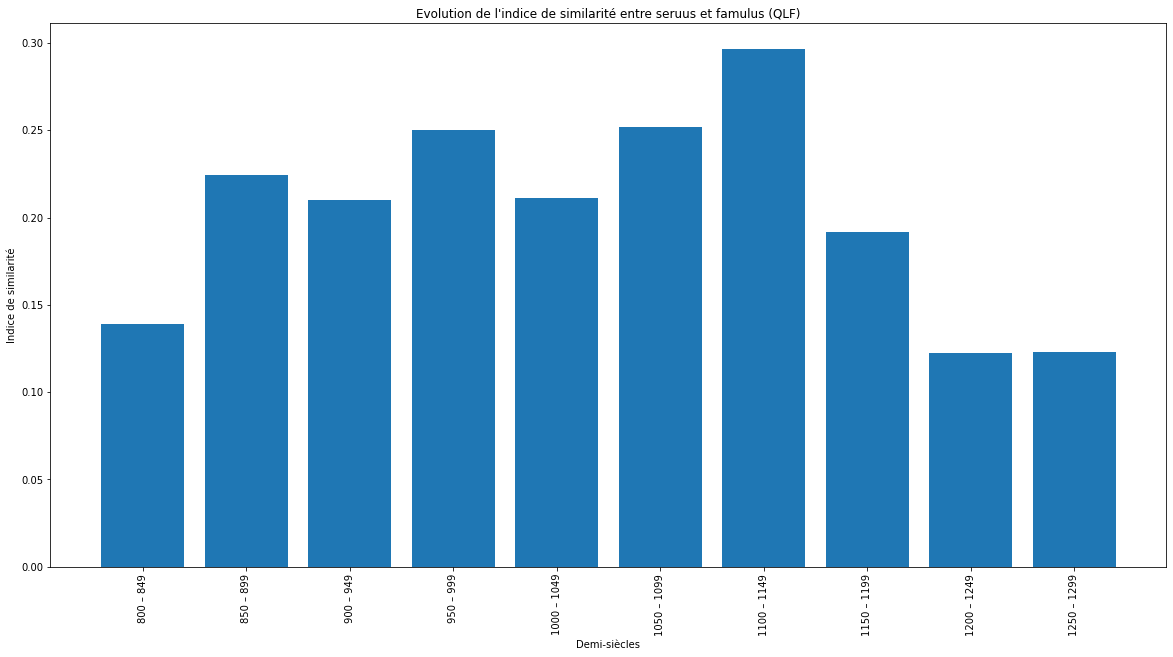

In [541]:
df_occurrences = pd.DataFrame(list(zip(liste_dates,liste_QLF_Serua)))
df_occurrences.columns = ["Dates","Indice de similarité"]
df_occurrences.set_index("Dates")
x = df_occurrences["Dates"]
y = df_occurrences["Indice de similarité"]
tickvalues = df_occurrences.index
plt.figure(figsize=(20,10))
plt.xticks(ticks = tickvalues, rotation ='vertical')
plt.xlabel("Demi-siècles")
plt.ylabel("Indice de similarité")
plt.title("Evolution de l'indice de similarité entre seruus et famulus (QLF)")
plt.bar(x,y)
plt.savefig("/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Serua/Similarité/Evolution_similarite_QLF", dpi=300)

[0 1 2 3 4 5 6 7 8 9]


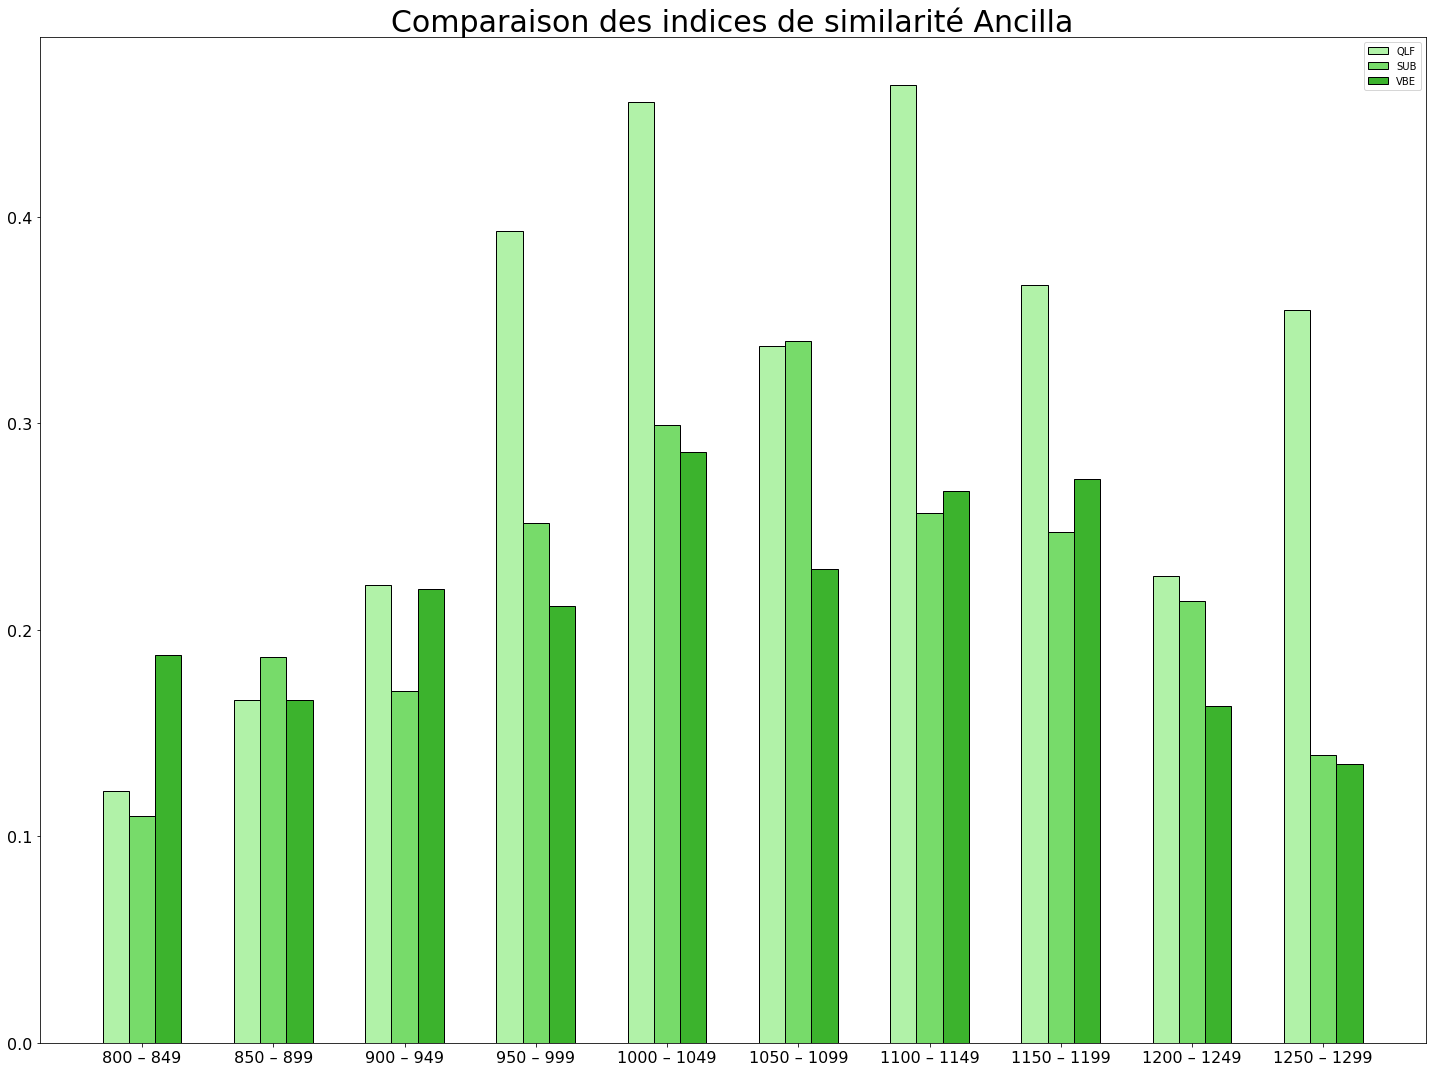

In [766]:
plt.figure(figsize=(20,15))

QLF_bar = np.arange(len(liste_dates), dtype=int)
SUB_bar = [i + w for i in QLF_bar]
VBE_bar = [i + 2*w for i in QLF_bar]
print(QLF_bar)
w = 0.2
c = '#b1f2a8'
c2 = '#77db6a'
c3 = '#3cb32d'

plt.bar(QLF_bar,liste_QLF_Ancilla, width=w, label="QLF", color=c,edgecolor='black')
plt.bar(SUB_bar, liste_SUB_Ancilla, width=w,label="SUB", color = c2,edgecolor='black')
plt.bar(VBE_bar,liste_VBE_Ancilla, width=w, label="VBE", color = c3,edgecolor='black')

QLF_bar_2 = [Qi+0.2 for Qi in QLF_bar]

plt.xticks(QLF_bar_2,liste_dates, ha = "center")

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title("Comparaison des indices de similarité Ancilla", fontsize=30)
plt.legend()
#plt.savefig('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Ancilla/Similarité/Graphique_de_comparaison_des_indices.png', dpi= 300)
plt.show()

[0 1 2 3 4 5 6 7 8 9]


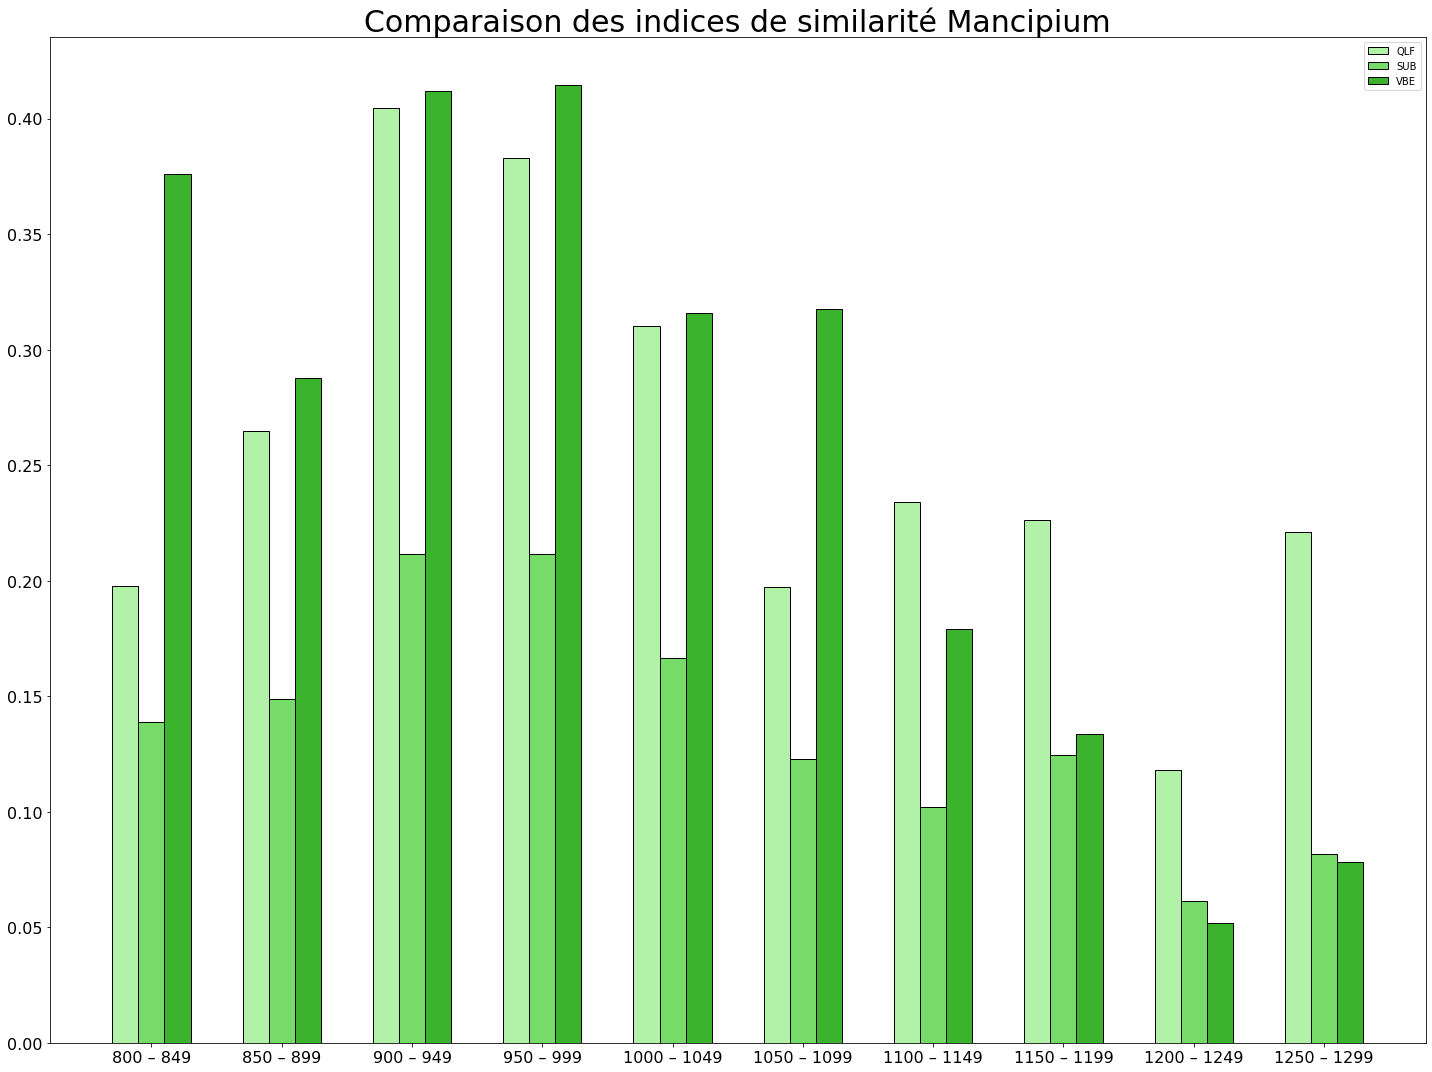

In [767]:
plt.figure(figsize=(20,15))

QLF_bar = np.arange(len(liste_dates), dtype=int)
SUB_bar = [i + w for i in QLF_bar]
VBE_bar = [i + 2*w for i in QLF_bar]
print(QLF_bar)
w = 0.2
c = '#b1f2a8'
c2 = '#77db6a'
c3 = '#3cb32d'

plt.bar(QLF_bar,liste_QLF_Mancipium, width=w, label="QLF", color=c,edgecolor='black')
plt.bar(SUB_bar, liste_SUB_Mancipium, width=w,label="SUB", color = c2,edgecolor='black')
plt.bar(VBE_bar,liste_VBE_Mancipium, width=w, label="VBE", color = c3,edgecolor='black')

QLF_bar_2 = [Qi+0.2 for Qi in QLF_bar]

plt.xticks(QLF_bar_2,liste_dates, ha = "center")

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title("Comparaison des indices de similarité Mancipium", fontsize=30)
plt.legend()
#plt.savefig('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Mancipium/Similarité/Graphique_de_comparaison_des_indices.png', dpi= 300)

plt.show()

[0 1 2 3 4 5 6 7 8 9]


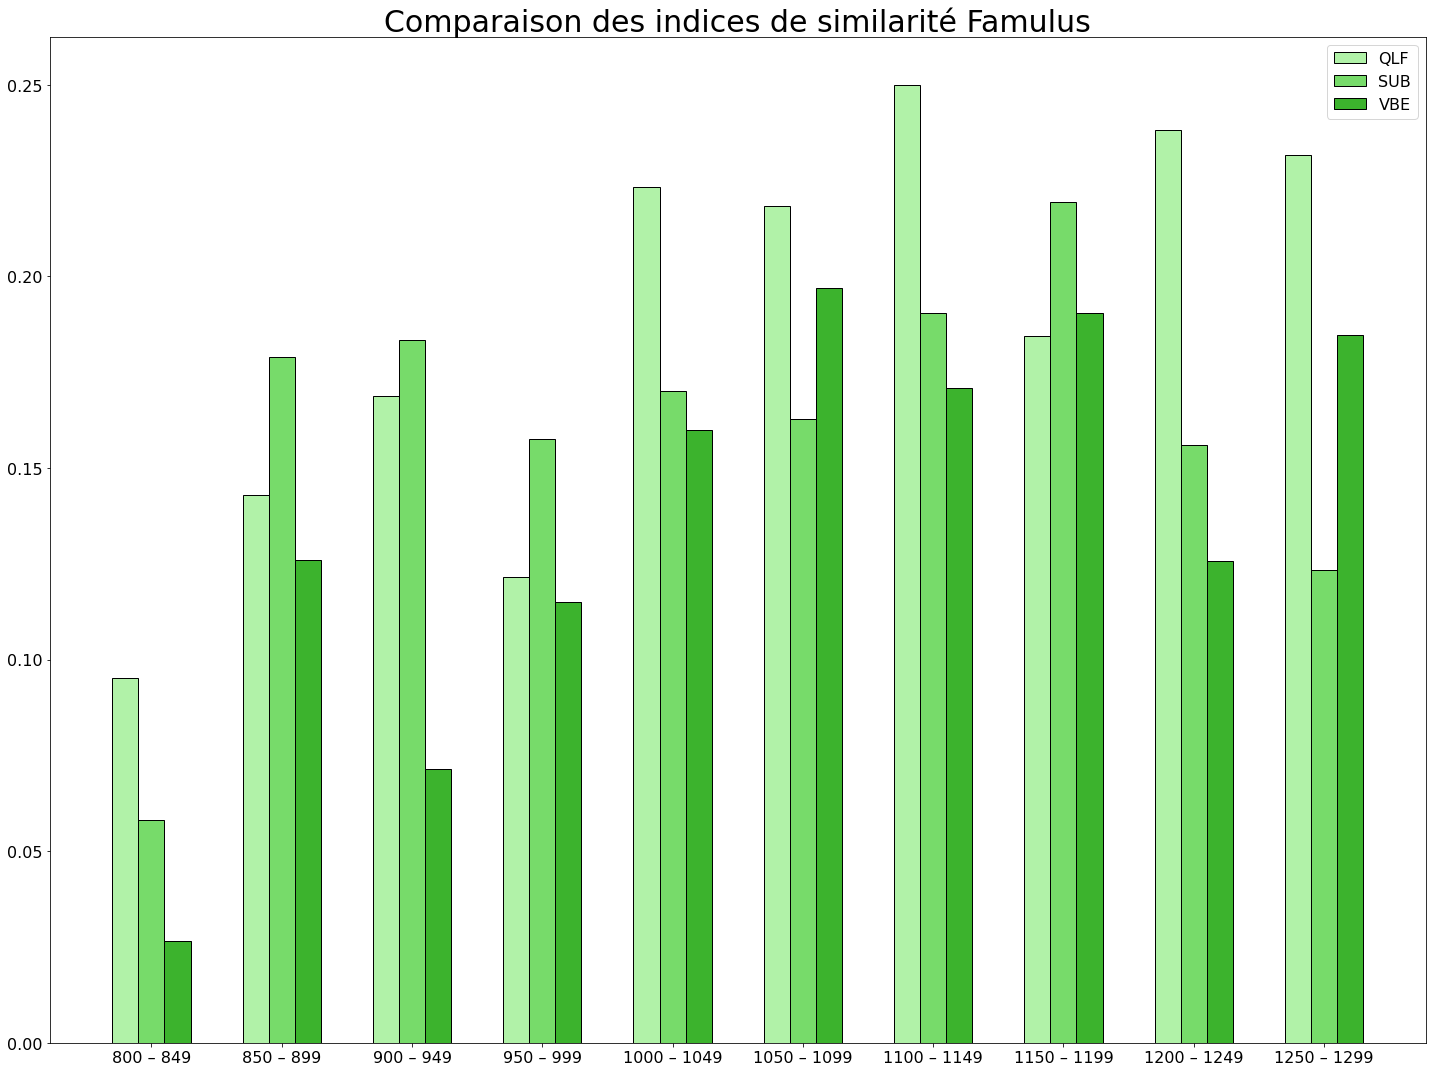

In [635]:
plt.figure(figsize=(20,15))

QLF_bar = np.arange(len(liste_dates), dtype=int)
SUB_bar = [i + w for i in QLF_bar]
VBE_bar = [i + 2*w for i in QLF_bar]
print(QLF_bar)
w = 0.2
c = '#b1f2a8'
c2 = '#77db6a'
c3 = '#3cb32d'

plt.bar(QLF_bar,liste_QLF_Famulus, width=w, label="QLF", color=c, edgecolor='black')
plt.bar(SUB_bar, liste_SUB_Famulus, width=w,label="SUB", color = c2,edgecolor='black')
plt.bar(VBE_bar,liste_VBE_Famulus, width=w, label="VBE", color = c3,edgecolor='black')

QLF_bar_2 = [Qi+0.2 for Qi in QLF_bar]

plt.xticks(QLF_bar_2,liste_dates, ha = "center")

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title("Comparaison des indices de similarité Famulus", fontsize=30)
plt.legend(fontsize=16)
plt.savefig('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Serua/Similarité/Graphique_de_comparaison_des_indices.png', dpi= 300)
plt.savefig('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Famulus/Similarité/Graphique_de_comparaison_des_indices.png', dpi= 300)
plt.show()

In [594]:
mean = (liste_QLF_Serua + liste_SUB_Serua + liste_VBE_Serua)/30

TypeError: unsupported operand type(s) for /: 'list' and 'int'

[0 1 2 3 4 5 6 7 8 9]


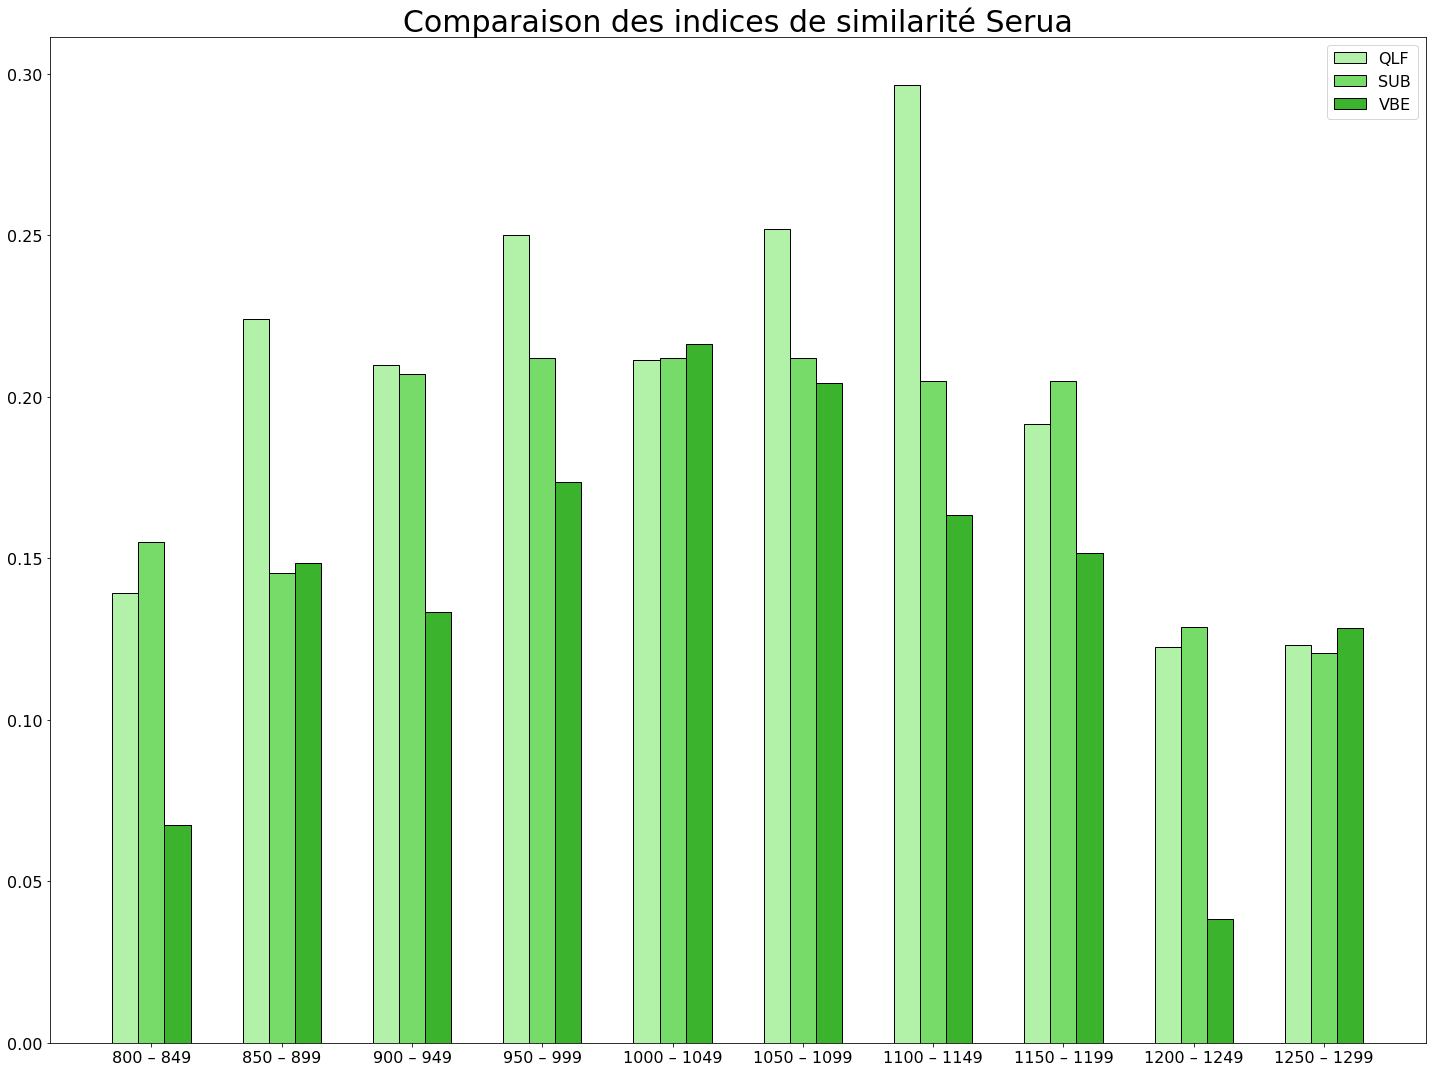

In [634]:
plt.figure(figsize=(20,15))

QLF_bar = np.arange(len(liste_dates), dtype=int)
SUB_bar = [i + w for i in QLF_bar]
VBE_bar = [i + 2*w for i in QLF_bar]
print(QLF_bar)
w = 0.2
c = '#b1f2a8'
c2 = '#77db6a'
c3 = '#3cb32d'

plt.bar(QLF_bar,liste_QLF_Serua, width=w, label="QLF", color=c, edgecolor='black')
plt.bar(SUB_bar, liste_SUB_Serua, width=w,label="SUB", color = c2,edgecolor='black')
plt.bar(VBE_bar,liste_VBE_Serua, width=w, label="VBE", color = c3,edgecolor='black')


QLF_bar_2 = [Qi+0.2 for Qi in QLF_bar]

plt.xticks(QLF_bar_2,liste_dates, ha = "center")

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title("Comparaison des indices de similarité Serua", fontsize=30)
plt.legend(fontsize=16)
plt.savefig('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Serua/Similarité/Graphique_de_comparaison_des_indices.png', dpi= 300)
plt.show()


[0 1 2 3 4 5 6 7 8 9]


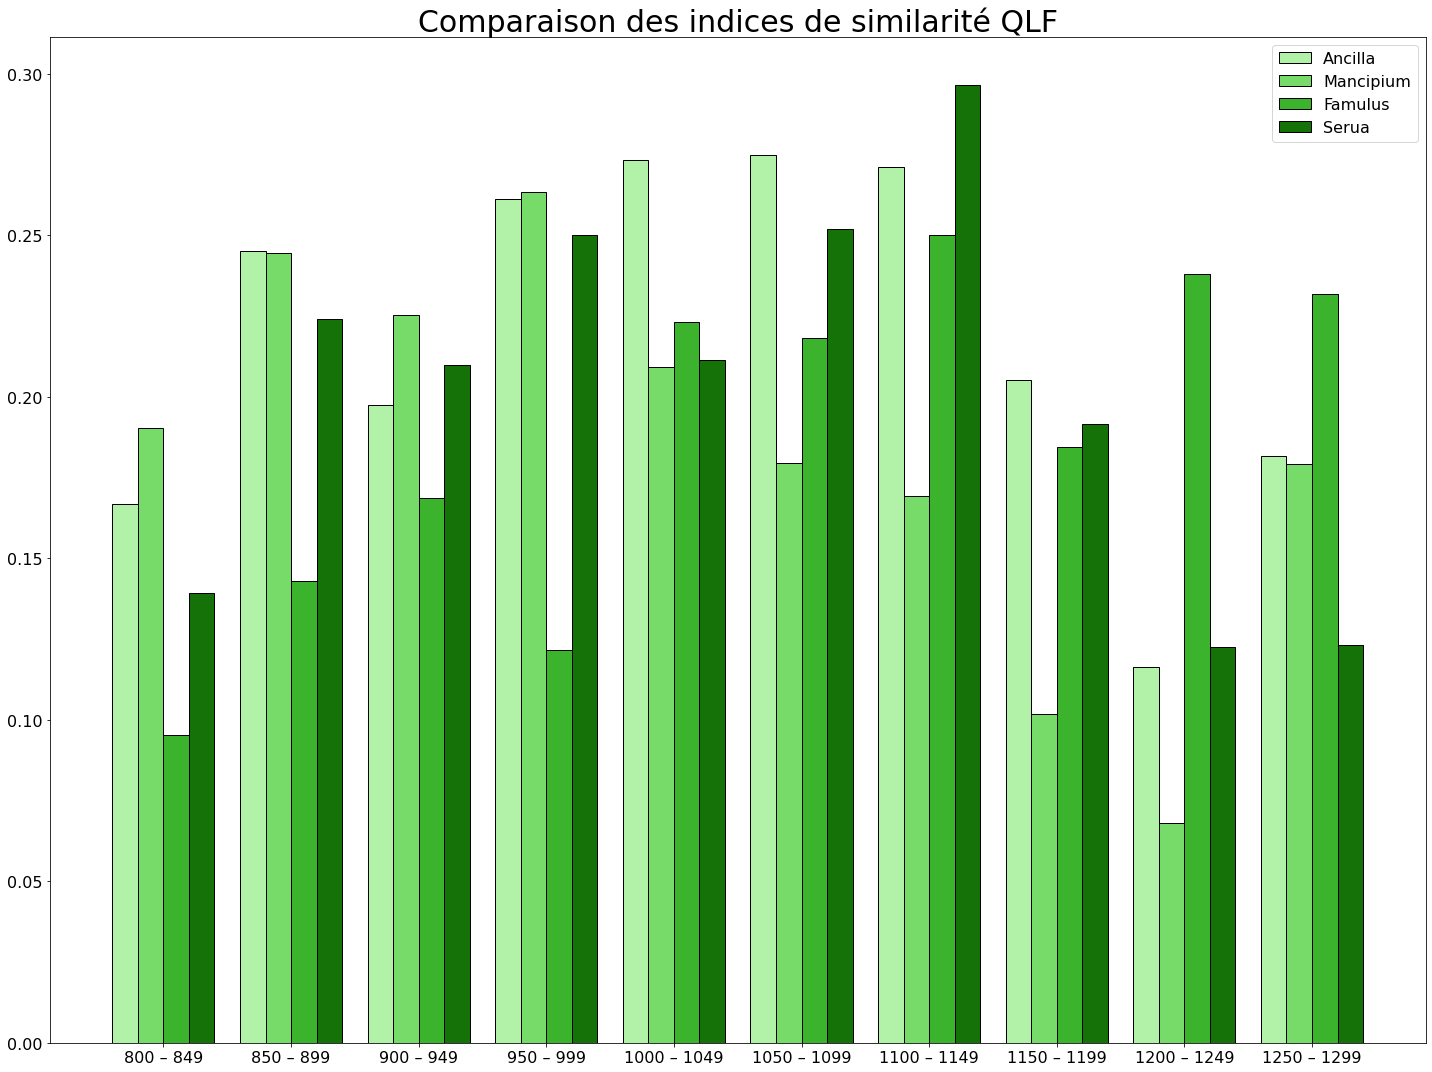

In [632]:
plt.figure(figsize=(20,15))

Ancilla_bar = np.arange(len(liste_dates), dtype=int)
Mancipium_bar = [i + w for i in Ancilla_bar]
Famulus_bar = [i + 2*w for i in Ancilla_bar]
Serua_bar = [i + 3*w for i in Ancilla_bar]

print(QLF_bar)

w = 0.2
c = '#b1f2a8'
c2 = '#77db6a'
c3 = '#3cb32d'
c4 = "#157209"



plt.bar(Ancilla_bar,liste_QLF_Ancilla, width=w, label="Ancilla", color=c, edgecolor='black')
plt.bar(Mancipium_bar, liste_QLF_Mancipium, width=w,label="Mancipium", color = c2,edgecolor='black')
plt.bar(Famulus_bar,liste_QLF_Famulus, width=w, label="Famulus", color = c3,edgecolor='black')
plt.bar(Serua_bar, liste_QLF_Serua, width=w, label="Serua", color = c4,edgecolor='black')

QLF_bar_2 = [Qi+0.3 for Qi in QLF_bar]

plt.xticks(QLF_bar_2,liste_dates, ha = "center")

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title("Comparaison des indices de similarité QLF", fontsize=30)
plt.legend(fontsize=16)
plt.savefig('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Graphique_de_comparaison_des_indices(QLF).png', dpi= 300)
plt.show()

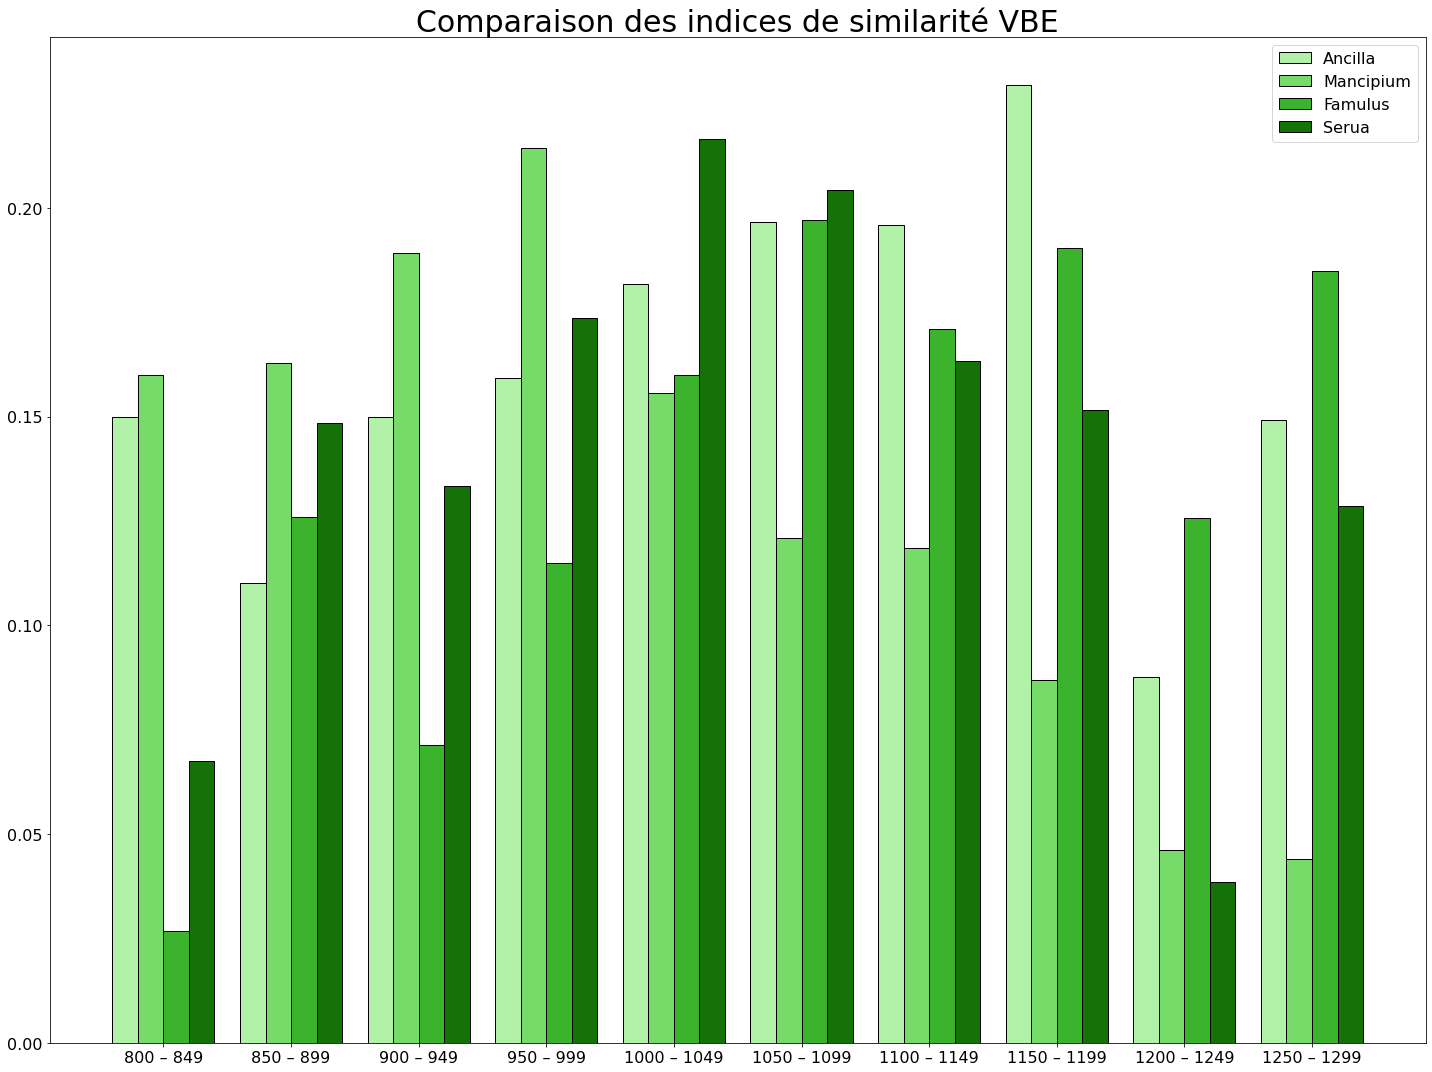

In [630]:
plt.figure(figsize=(20,15))

Ancilla_bar = np.arange(len(liste_dates), dtype=int)
Mancipium_bar = [i + w for i in Ancilla_bar]
Famulus_bar = [i + 2*w for i in Ancilla_bar]
Serua_bar = [i + 3*w for i in Ancilla_bar]

w = 0.2
c = '#b1f2a8'
c2 = '#77db6a'
c3 = '#3cb32d'
c4 = "#157209"

plt.bar(Ancilla_bar,liste_VBE_Ancilla, width=w, label="Ancilla", color=c, edgecolor='black')
plt.bar(Mancipium_bar, liste_VBE_Mancipium, width=w,label="Mancipium", color = c2,edgecolor='black')
plt.bar(Famulus_bar,liste_VBE_Famulus, width=w, label="Famulus", color = c3,edgecolor='black')
plt.bar(Serua_bar, liste_VBE_Serua, width=w, label="Serua", color = c4,edgecolor='black')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
#plt.xticks(QLF_bar,liste_dates, ha = "left")

QLF_bar_2 = [Qi+0.3 for Qi in QLF_bar]

plt.xticks(QLF_bar_2,liste_dates, ha = "center")

plt.title("Comparaison des indices de similarité VBE", fontsize=30)
plt.legend(fontsize=16)
#plt.savefig('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Graphique_de_comparaison_des_indices(VBE).png', dpi= 300)
plt.show()

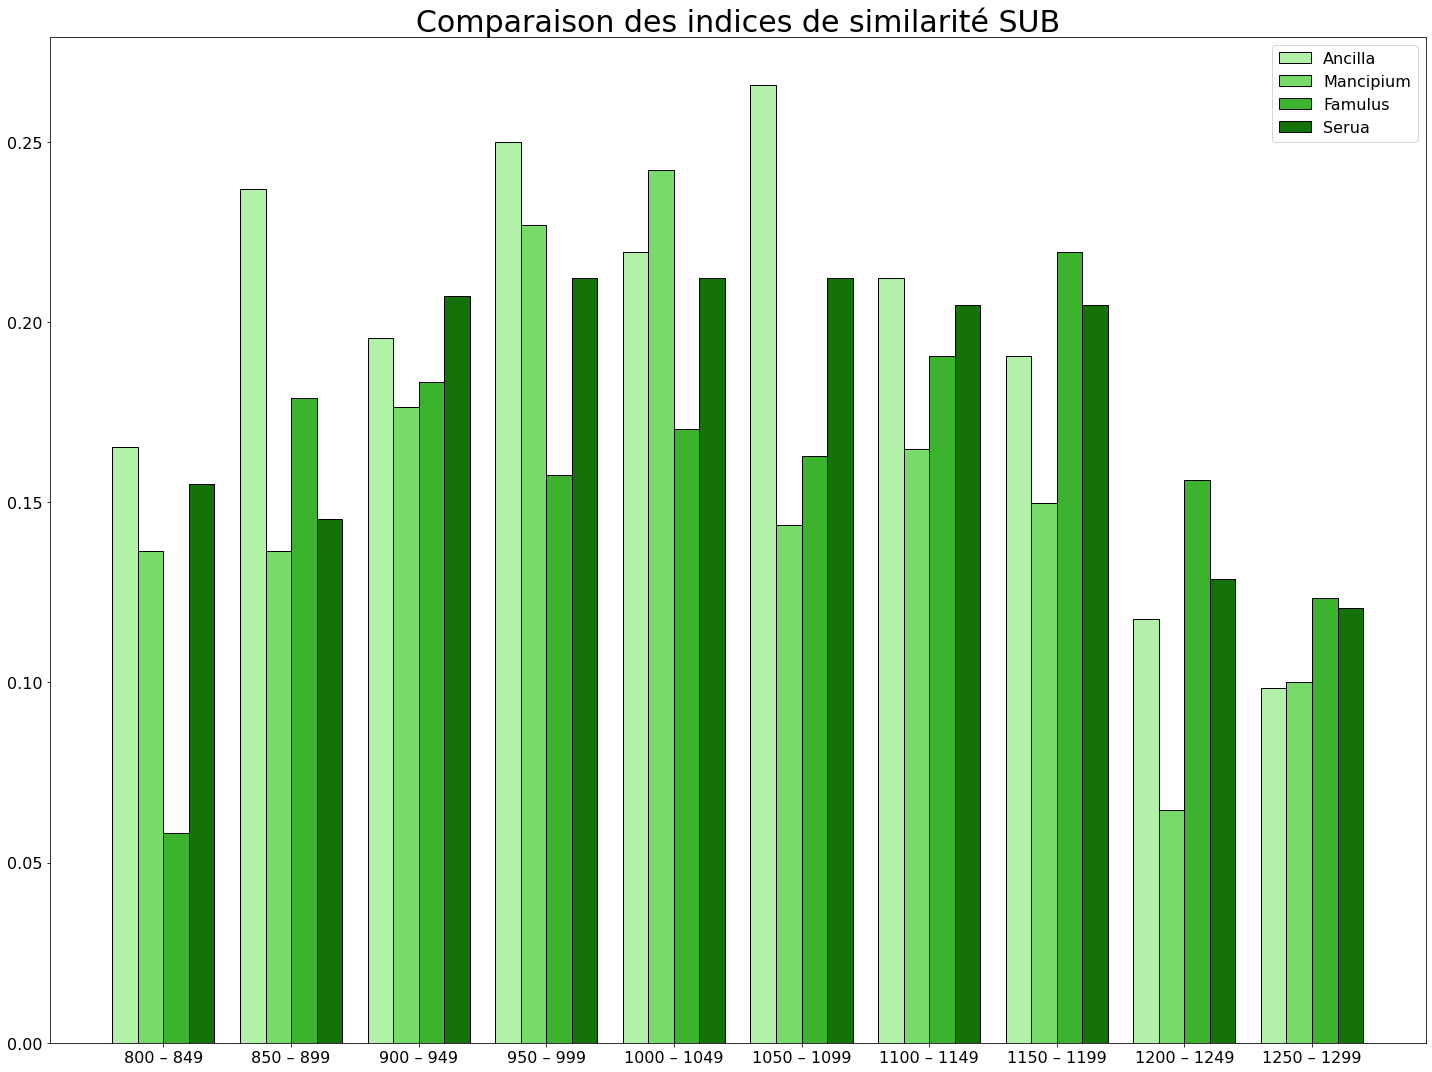

In [631]:
plt.figure(figsize=(20,15))

Ancilla_bar = np.arange(len(liste_dates), dtype=int)
Mancipium_bar = [i + w for i in Ancilla_bar]
Famulus_bar = [i + 2*w for i in Ancilla_bar]
Serua_bar = [i + 3*w for i in Ancilla_bar]

w = 0.2
c = '#b1f2a8'
c2 = '#77db6a'
c3 = '#3cb32d'
c4 = "#157209"



plt.bar(Ancilla_bar,liste_SUB_Ancilla, width=w, label="Ancilla", color=c, edgecolor='black')
plt.bar(Mancipium_bar, liste_SUB_Mancipium, width=w,label="Mancipium", color = c2,edgecolor='black')
plt.bar(Famulus_bar,liste_SUB_Famulus, width=w, label="Famulus", color = c3,edgecolor='black')
plt.bar(Serua_bar, liste_SUB_Serua, width=w, label="Serua", color = c4,edgecolor='black')

QLF_bar_2 = [Qi+0.3 for Qi in QLF_bar]

plt.xticks(QLF_bar_2,liste_dates, ha = "center")

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title("Comparaison des indices de similarité SUB", fontsize=30)
plt.legend(fontsize=16)
plt.savefig('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Graphique_de_comparaison_des_indices(SUB).png', dpi= 300)
plt.show()